In [1]:
from lxml import etree

# Parsen  Teil der Datei um die Struktur zu verstehen
for event, element in etree.iterparse('gebaudehoehen.xml', events=('start',), tag='IhrTag'):
    # Verarbeite Element
    print(element.tag, element.text)
    #  element freigeben, um Speicher zu sparen
    element.clear()


In [2]:
from lxml import etree

def extract_unique_tags(file_path):
    unique_tags = set()
    for _, element in etree.iterparse(file_path, events=('end',)):
        unique_tags.add(element.tag)
        # Löscht das Element aus dem Speicher, um Speicherplatz zu sparen
        element.clear()

    return unique_tags

# Pfad zu XML-Datei
file_path = 'gebaudehoehen.xml'

# Aufruf der Funktion
unique_tags = extract_unique_tags(file_path)
for tag in unique_tags:
    print(tag)



{http://www.berlin.de/broker}funktion_txt
{http://www.opengis.net/gml/3.2}interior
{http://www.berlin.de/broker}quellebodenhoehe_txt
{http://www.berlin.de/broker}quellelage
{http://www.berlin.de/broker}quelledachhoehe_txt
{http://www.berlin.de/broker}quelledachhoehe
{http://www.opengis.net/gml/3.2}MultiSurface
{http://www.berlin.de/broker}gml_id
{http://www.berlin.de/broker}dachart
{http://www.opengis.net/gml/3.2}surfaceMember
{http://www.opengis.net/gml/3.2}exterior
{http://www.opengis.net/gml/3.2}lowerCorner
{http://www.berlin.de/broker}dachart_txt
{http://www.opengis.net/gml/3.2}posList
{http://www.berlin.de/broker}role_txt
{http://www.berlin.de/broker}quellelage_txt
{http://www.berlin.de/broker}name
{http://www.berlin.de/broker}s_06_10_1gebhoehen
{http://www.berlin.de/broker}hnr
{http://www.opengis.net/gml/3.2}Polygon
{http://www.berlin.de/broker}funktion
{http://www.berlin.de/broker}hoehe
{http://www.berlin.de/broker}geom
{http://www.berlin.de/broker}strasse
{http://www.berlin.de/

In [3]:
import csv
from lxml import etree

def extract_data_to_csv(xml_file, csv_file, tags):
    with open(csv_file, 'w', newline='', encoding='utf-8') as out_csv:
        csv_writer = csv.writer(out_csv)
        csv_writer.writerow(tags)  # Schreibt die Header-Zeile

        for event, element in etree.iterparse(xml_file, events=('end',), tag=tags):
            if element.tag in tags:
                csv_writer.writerow([element.text if element.tag == tag else '' for tag in tags])
            element.clear()

# Pfad zur XML-Datei
xml_file = 'gebaudehoehen.xml'

# Ausgabe-CSV-Datei
csv_file = 'output.csv'

# Tags, die extrahiert werden sollen
tags = ['{http://www.berlin.de/broker}hoehe', '{http://www.berlin.de/broker}strasse']

# Funktion aufrufen
extract_data_to_csv(xml_file, csv_file, tags)


In [6]:
import csv
from lxml import etree

def extract_data_to_csv(xml_file, csv_file, tags):
    with open(csv_file, 'w', newline='', encoding='utf-8') as out_csv:
        csv_writer = csv.writer(out_csv)
        csv_writer.writerow(['gml_id', 'name', 'funktion', 'hoehe', 'Polygon'])  # Header der CSV

        for _, element in etree.iterparse(xml_file, events=('end',)):
            if element.tag in tags:
                #  die Tags aus WFS
                data = [element.get('{http://www.berlin.de/broker}gml_id'),
                        element.get('{http://www.berlin.de/broker}name'),
                        element.get('{http://www.berlin.de/broker}funktion'),
                        element.get('{http://www.berlin.de/broker}hoehe'),
                        element.get('{http://www.opengis.net/gml/3.2}Polygon')]
                csv_writer.writerow(data)
            element.clear()

# Pfad zu XML-Datei
xml_file = 'gebaudehoehen.xml'

# Ausgabe-CSV-Datei
csv_file = 'output.csv'

# Tags, die extrahiert werden sollen
tags = ['{http://www.berlin.de/broker}gml_id', 
        '{http://www.berlin.de/broker}name', 
        '{http://www.berlin.de/broker}funktion', 
        '{http://www.berlin.de/broker}hoehe', 
        '{http://www.opengis.net/gml/3.2}Polygon']

# Funktion aufrufen
extract_data_to_csv(xml_file, csv_file, tags)


In [9]:
# Pfad zur XML-Datei
file_path = 'gebaudehoehen.xml'

# Öffnen  und Lesen der ersten 1000 Zeichen
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read(50000)
    print(content)


<ns0:FeatureCollection xmlns:ns0="http://www.opengis.net/wfs/2.0" xmlns:ns2="http://www.opengis.net/gml/3.2" xmlns:ns3="http://www.berlin.de/broker" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" numberMatched="886374" numberReturned="886374" timeStamp="2024-01-26T01:21:10.484" xsi:schemaLocation="http://www.berlin.de/broker https://fbinter.stadt-berlin.de/fb/wfs/data/senstadt/s_06_10_1gebhoehen?REQUEST=DescribeFeatureType&amp;SERVICE=WFS&amp;VERSION=2.0.0&amp;TYPENAMES=fis:s_06_10_1gebhoehen http://www.opengis.net/wfs/2.0 http://schemas.opengis.net/wfs/2.0/wfs.xsd http://www.opengis.net/gml/3.2 http://schemas.opengis.net/gml/3.2.1/gml.xsd"><ns0:boundedBy><ns2:Envelope srsName="EPSG:25833"><ns2:lowerCorner>370000.0 415000.0</ns2:lowerCorner><ns2:upperCorner>5800000.0 5837000.0</ns2:upperCorner></ns2:Envelope></ns0:boundedBy><ns0:member><ns3:s_06_10_1gebhoehen ns2:id="s_06_10_1gebhoehen.1"><ns3:gml_id>DEBE3D06YYD0001Ckm</ns3:gml_id><ns3:role_txt>Geb&#228;ude</ns3:role_txt><ns3:ho

In [1]:
import xml.etree.ElementTree as ET
import csv

# Pfad zur XML-Datei
xml_file_path = 'gebaudehoehen.xml'

# Pfad zur CSV-Datei
csv_file_path = 'output_polygon.csv'

def extract_funktion_from_xml(xml_file, csv_file):
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        for event, elem in ET.iterparse(xml_file, events=('end',)):
            if elem.tag.endswith('gml_id'):
                writer.writerow([elem.text])
                elem.clear()

# Ausführen der Funktion
extract_funktion_from_xml(xml_file_path, csv_file_path)


In [ ]:
import xml.etree.ElementTree as ET
import csv

# Pfad zur XML-Datei
xml_file_path = 'gebaudehoehen.xml'

# Pfad zur CSV-Datei
csv_file_path = 'output_polygon.csv'

def extract_funktion_from_xml(xml_file, csv_file):
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        for event, elem in ET.iterparse(xml_file, events=('end',)):
            if elem.tag.endswith('gml_id'):
                writer.writerow([elem.text])
                elem.clear()

# Ausführen der Funktion
extract_funktion_from_xml(xml_file_path, csv_file_path)


In [2]:
import xml.etree.ElementTree as ET
import csv

# Pfad zur XML-Datei
xml_file_path = 'gebaudehoehen.xml'

# Pfad zur CSV-Datei
csv_file_path = 'output_relevant_all.csv'

def extract_data_from_xml(xml_file, csv_file):
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # Schreiben des Headers in die CSV-Datei
        writer.writerow(['gml_id', 'role_txt', 'dachart_txt', 'polygon', 'hoehe'])

        # Werte sammeln
        values = {}

        for event, elem in ET.iterparse(xml_file, events=('start', 'end')):
            if event == 'start':
                # Initialisieren der Werte, wenn ein neues Gebäudeelement beginnt
                if elem.tag.endswith('s_06_10_1gebhoehen'):
                    values = {'gml_id': '', 'role_txt': '', 'dachart_txt': '', 'polygon': '', 'hoehe': ''}
            elif event == 'end':
                tag = elem.tag.split('}')[-1]  # Entfernen des Namespace
                if tag in values:
                    values[tag] = elem.text
                # Speichern des Polygons
                if tag == 'posList':
                    values['polygon'] = elem.text
                # Wenn das Ende des Gebäudeelements erreicht ist, schreibe die gesammelten Daten
                if tag == 's_06_10_1gebhoehen':
                    writer.writerow([values['gml_id'], values['role_txt'], values['dachart_txt'], values['polygon'], values['hoehe']])
                elem.clear()

# Ausführen der Funktion
extract_data_from_xml(xml_file_path, csv_file_path)


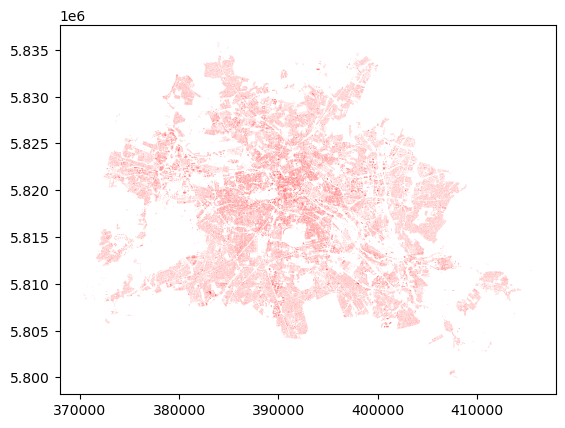

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Polygon

# CSV-Datei einlesen
df = pd.read_csv('output_relevant_all.csv')

# Funktion, um Koordinaten in Polygon-Objekte umzuwandeln
def create_polygon(row):
    points = row.split()
    coord_pairs = [(float(points[i]), float(points[i+1])) for i in range(0, len(points), 2)]
    return Polygon(coord_pairs)

# Umwandeln der Polygon-Daten in Shapely Polygon-Objekte
df['polygon'] = df['polygon'].apply(create_polygon)

# Einen Plot erstellen
fig, ax = plt.subplots()

for polygon in df['polygon']:
    x, y = polygon.exterior.xy
    ax.fill(x, y, alpha=0.5, fc='r', ec='none')

plt.show()


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Polygon

# CSV-Datei einlesen
df = pd.read_csv('output_relevant_all.csv')

# Funktion, um Koordinaten in Polygon-Objekte umzuwandeln
def create_polygon(row):
    points = row.split()
    coord_pairs = [(float(points[i]), float(points[i+1])) for i in range(0, len(points), 2)]
    return Polygon(coord_pairs)

# Umwandeln der Polygon-Daten in Shapely Polygon-Objekte
df['polygon'] = df['polygon'].apply(create_polygon)

# Einen Plot erstellen
fig, ax = plt.subplots()

for polygon in df['polygon']:
    x, y = polygon.exterior.xy
    ax.fill(x, y, alpha=0.5, fc='black', ec='none') # Farben invertiert (schwarz statt rot)

plt.gca().invert_yaxis() # Y-Achse invertieren für traditionelle Kartendarstellung
plt.savefig('gebaudehohe_polygon_plot.png', dpi=1200) # Speichern als PNG mit hoher Auflösung
plt.close()




In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Polygon

# Funktion, um die Farbe basierend auf der Gebäudehöhe festzulegen
def get_color(hoehe):
    if hoehe < 10:
        return 'yellow'
    elif hoehe < 20:
        return 'blue'
    elif hoehe < 30:
        return 'green'
    elif hoehe < 40:
        return 'orange'
    else:
        return 'white'

# Funktion, um Koordinaten in Polygon-Objekte umzuwandeln
def create_polygon(row):
    points = row.split()
    coord_pairs = [(float(points[i]), float(points[i+1])) for i in range(0, len(points), 2)]
    return Polygon(coord_pairs)

# CSV-Datei einlesen
df = pd.read_csv('output_relevant_all.csv')

# Umwandeln der Polygon-Daten in Shapely Polygon-Objekte
df['polygon'] = df['polygon'].apply(create_polygon)



# GeoJSON-Daten einlesen
with open('strassenflaechen.geojson', 'r') as f:
    geojson_data = json.load(f)

# Einen Plot erstellen
fig, ax = plt.subplots()
ax.set_facecolor('black')  # Hintergrundfarbe

# GeoJSON-Polygone in grauer Farbe plotten
for feature in geojson_data['features']:
    geom = shape(feature['geometry'])
    if isinstance(geom, Polygon):
        x, y = geom.exterior.xy
        ax.fill(x, y, alpha=0.5, fc='grey', ec='none')



# Einen Plot erstellen
fig, ax = plt.subplots()
ax.set_facecolor('black')  # Hintergrundfarbe

for index, row in df.iterrows():
    polygon = row['polygon']
    hoehe = row['hoehe']
    if polygon and isinstance(polygon, Polygon):
        x, y = polygon.exterior.xy
        ax.fill(x, y, alpha=0.5, fc=get_color(hoehe), ec='none')

plt.axis('equal')  # Gleiches Seitenverhältnis
plt.savefig('gebaudehohe_polygon_plot_black.png', dpi=1500) # Speichern als PNG mit hoher Auflösung
plt.close()


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import json
from shapely.geometry import Polygon, shape
from matplotlib.patches import Patch



import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Polygon

# Funktion, um die Farbe basierend auf der Gebäudehöhe festzulegen
def get_color(hoehe):
    if hoehe < 10:
        return 'yellow'
    elif hoehe < 20:
        return 'orange'
    elif hoehe < 30:
        return 'red'
    elif hoehe < 40:
        return 'purple'
    else:
        return 'blue'

# Funktion, um Koordinaten in Polygon-Objekte umzuwandeln
def create_polygon(row):
    points = row.split()
    coord_pairs = [(float(points[i]), float(points[i+1])) for i in range(0, len(points), 2)]
    return Polygon(coord_pairs)

# CSV-Datei einlesen
df = pd.read_csv('output_relevant_all.csv')

# Umwandeln der Polygon-Daten in Shapely Polygon-Objekte
df['polygon'] = df['polygon'].apply(create_polygon)



# GeoJSON-Daten einlesen
#with open('strassenflaechen.geojson', 'r') as f:
#    geojson_data = json.load(f)

# Einen Plot erstellen
#fig, ax = plt.subplots()
#ax.set_facecolor('grey')  # Hintergrundfarbe

# GeoJSON-Polygone in grauer Farbe plotten
#for feature in geojson_data['features']:
#    geom = shape(feature['geometry'])
#    if isinstance(geom, Polygon):
#        x, y = geom.exterior.xy
#        ax.fill(x, y, alpha=0.5, fc='grey', ec='none')



# Plot
fig, ax = plt.subplots()
ax.set_facecolor('black')  # 

for index, row in df.iterrows():
    polygon = row['polygon']
    hoehe = row['hoehe']
    if polygon and isinstance(polygon, Polygon):
        x, y = polygon.exterior.xy
        ax.fill(x, y, alpha=0.5, fc=get_color(hoehe), ec='none')

# Legende erstellen
legend_elements = [
    Patch(facecolor='yellow', label=' ≤ 10 Meter'),
    Patch(facecolor='orange', label=' ≤ 20 Meter'),
    Patch(facecolor='red', label=' ≤ 30 Meter '),
    Patch(facecolor='purple', label='30 ≤ 40 Meter'),
    Patch(facecolor='blue', label=' ≥ 40 Meter')
    #Patch(facecolor='grey', label=' Straßennetz')
]
ax.legend(handles=legend_elements, loc='upper right', title='Gebäudehöhen Berlin', fontsize='small', title_fontsize='medium')


plt.axis('equal')  # Gleiches Seitenverhältnis
plt.savefig('gebaudehohe_polygon_plot_black_optimized_blue.png', dpi=1500) # Speichern als PNG mit hoher Auflösung
plt.close()


In [1]:
import folium
import pandas as pd

# CSV-Datei einlesen
df = pd.read_csv('output_relevant_all.csv')

# Folium Karte erstellen
m = folium.Map(location=[581500, 390000], zoom_start=12)  # Ersetzen Sie latitude und longitude mit Ihren Werten

# Polygone zur Karte hinzufügen
for index, row in df.iterrows():
    # Koordinaten des Polygons extrahieren
    polygon_coords = [(float(y), float(x)) for x, y in zip(row['polygon'].split()[0::2], row['polygon'].split()[1::2])]
    
    # Polygon auf der Karte hinzufügen
    folium.Polygon(
        locations=polygon_coords,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Karte speichern
m.save('osm_polygon_map.html')


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import json
from shapely.geometry import Polygon, shape
from matplotlib.patches import Patch


# GeoJSON-Daten einlesen
with open('strassenflaechen.geojson', 'r') as f:
    geojson_data = json.load(f)

# Einen Plot erstellen
fig, ax = plt.subplots()
ax.set_facecolor('black')  # Hintergrundfarbe ändern

# GeoJSON-Polygone in grauer Farbe plotten
for feature in geojson_data['features']:
    geom = shape(feature['geometry'])
    if isinstance(geom, Polygon):
        x, y = geom.exterior.xy
        ax.fill(x, y, alpha=0.5, fc='grey', ec='none')

# Gebäudepolygone plotten
for index, row in df.iterrows():
    polygon = row['polygon']
    hoehe = row['hoehe']
    if polygon and isinstance(polygon, Polygon):
        x, y = polygon.exterior.xy
        ax.fill(x, y, alpha=0.5, fc=get_color(hoehe), ec='none')

# Legende erstellen
legend_elements = [
    Patch(facecolor='yellow', label=' ≤ 10 Meter'),
    Patch(facecolor='blue', label=' ≤ 20 Meter'),
    Patch(facecolor='green', label=' ≤ 30 Meter '),
    Patch(facecolor='orange', label='30 ≤ 40 Meter'),
    Patch(facecolor='white', label=' ≥ 40 Meter'),
    Patch(facecolor='grey', label=' Straßennetz')
]
ax.legend(handles=legend_elements, loc='upper right', title='Gebäudehöhen', fontsize='small', title_fontsize='medium')

plt.axis('equal')  # Gleiches Seitenverhältnis
plt.savefig('gebaudehohe_polygon_plot_black_with_streets.png', dpi=1500)  # Speichern als PNG mit hoher Auflösung
plt.close()


In [9]:
import folium

# Startpunkt für die Karte setzen (z.B. Berlin)
m = folium.Map(location=[52.5200, 13.4050], zoom_start=12)

# Polygon-Daten (Beispiel Koordinaten für ein Polygon)
coords = [[(52.5200, 13.4050), (52.5200, 13.4100), (52.5150, 13.4100), (52.5150, 13.4050)]]

# Polygon hinzufügen
folium.Polygon(
    locations=coords[0],
    color='blue',
    fill=True,
    fill_color='cyan'
).add_to(m)

# Karte anzeigen
m
